# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [3]:
sinasc1=sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]
sinasc1.groupby('munResNome').median()

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.0,28.5
Alto Alegre dos Parecis,25.0,28.0
Alto Paraíso,24.0,25.5
Alvorada D'Oeste,25.0,31.0
Ariquemes,25.0,29.0
Buritis,25.0,28.5
Cabixi,26.0,35.5
Cacaulândia,25.0,33.5
Cacoal,26.0,30.0


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [8]:
sinasc2=sinasc_raw[['DTNASC', 'PESO', 'ESCMAE']]
sinasc2[sinasc2['DTNASC'] == '2019-11-10'].groupby('ESCMAE')['PESO'].mean().to_frame()

,PESO
ESCMAE,
1 a 3 anos,3377.500000
12 anos ou mais,2953.888889
4 a 7 anos,3275.769231
8 a 11 anos,3346.666667
Nenhuma,3075.000000


### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [64]:
agrupamento=sinasc1.groupby('munResNome')['IDADEMAE']
agrupamento.agg([('numNasc','count')]).sort_values(by = 'numNasc', ascending = True)

,numNasc
munResNome,
Município ignorado - RO,1
Castanheiras,32
Pimenteiras do Oeste,40
Primavera de Rondônia,43
Parecis,44
Rio Crespo,50
São Felipe D'Oeste,54
Teixeirópolis,64
Cacaulândia,75


In [87]:
agrupamento=sinasc1[sinasc1['munResNome'] == 'Castanheiras']
agrupamento.groupby('munResNome').agg([('média','mean'),('máximo','max'),('mínimo','min')])

IDADEMAE                 IDADEPAI              
                 média máximo mínimo      média máximo mínimo
munResNome                                                   
Castanheiras  27.28125     39     17  30.392857   43.0   17.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [100]:
sinasc4 = sinasc_raw[['IDADEMAE', 'SEXO', 'QTDFILVIVO','DTNASC','IDADEPAI','munResNome']].copy()
sinasc4.loc[:,'DTNASC'] = pd.to_datetime(sinasc4['DTNASC'])
sinasc4.set_index('DTNASC', inplace=True)
sinasc4['MES'] = sinasc4.index.month

In [108]:
agrupamento=sinasc4[sinasc4['MES'] == 3]
agrupamento.groupby('munResNome')['IDADEMAE'].agg([('numNasc','count')]).sort_values(by = 'numNasc', ascending = False)

,numNasc
munResNome,
Porto Velho,744
Ji-Paraná,188
Vilhena,148
Ariquemes,141
Cacoal,133
Jaru,80
Guajará-Mirim,75
Rolim de Moura,69
Ouro Preto do Oeste,67


In [115]:
agrupamento=sinasc4[sinasc4['munResNome'] == 'Porto Velho']
agrupamento.groupby('munResNome').agg({'QTDFILVIVO':[('mínimo','min'),('máximo','max'),('média', 'mean')],
                                       'IDADEMAE':[('mínimo','min'),('máximo','max'),('média', 'mean')],
                                       'IDADEPAI':[('mínimo','min'),('máximo','max'),('média', 'mean')]})

QTDFILVIVO                  IDADEMAE                  IDADEPAI  \
                mínimo máximo     média   mínimo máximo     média   mínimo   
munResNome                                                                   
Porto Velho        0.0   12.0  1.167236       12     47  26.31267     16.0   

                               
            máximo      média  
munResNome                     
Porto Velho   65.0  32.352679

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

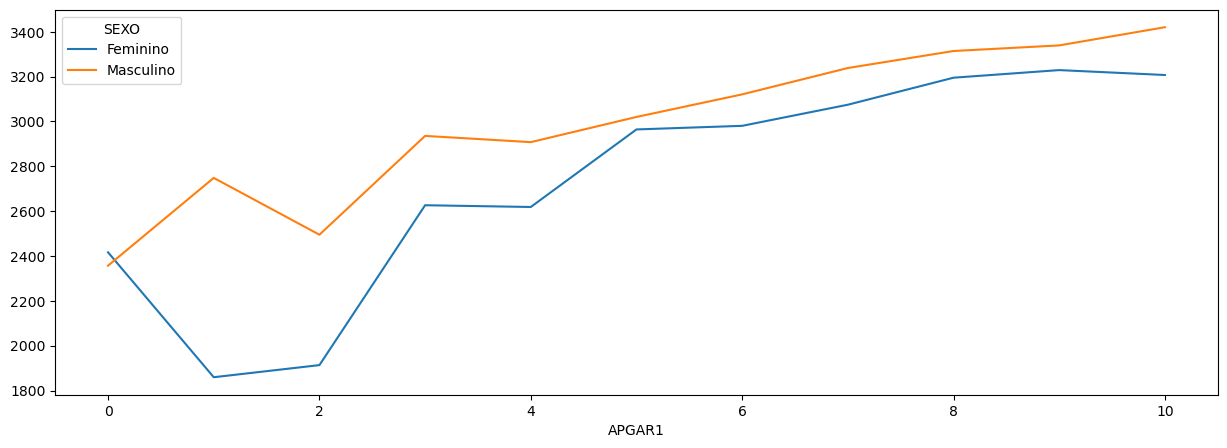

In [119]:
sinasc_raw.groupby(['APGAR1', 'SEXO'])['PESO'].mean().unstack().plot(figsize=[15,5]);

Pode se observar que quanto maior o peso tende-se a ter um melhor APGAR1

In [6]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [7]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


In [4]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')